In [222]:
import pandas as pd 
import numpy as np
from faker import Faker
from feature_engine.outliers import Winsorizer

In [223]:
def generate_customer_data(num_rows):
  fake = Faker()
  
  data = {
      'Winning_percentage':np.random.randint(5,80,size=num_rows),
      'Days_Since_Last_Bet':np.random.randint(1,40,size=num_rows),
      'Active_Days' :np.random.randint(1,40,size=num_rows)
  }
  df = pd.DataFrame(data)
  return df
num_rows = 5000
df1 = generate_customer_data(num_rows)
print(df1.head())

   Winning_percentage  Days_Since_Last_Bet  Active_Days
0                  47                   37           14
1                  55                   27           15
2                  63                   30           12
3                  56                   11           38
4                  64                   23           39


Generating one features

Generating new feature after considering n features

In [224]:
import numpy as np

def generate_correlated_feature_multiple(df, features, target_corrs, max_iter=100, tol=1e-4):

  # Extract features as NumPy array
  X = df[features].values

  # Initialize weights
  weights = np.ones(len(features))

  for _ in range(max_iter):
    new_feature = np.dot(X, weights)
    corrs = np.corrcoef(new_feature, X, rowvar=False)[0, 1:]
    diff = target_corrs - corrs
    weights += diff * 0.1

    if np.all(np.abs(diff) < tol):
      break

  return new_feature


In [225]:
import pandas as pd
import numpy as np

def generate_correlated_feature(df, feature, target_corr):


  # Extract feature as NumPy array
  x = df[feature].values

  # Standardize feature
  x_std = (x - np.mean(x)) / np.std(x)

  # Calculate covariance for the new feature
  cov_xy = target_corr * np.std(x)

  # Generate the new feature
  new_feature = np.random.randn(len(df)) + x_std * cov_xy / np.std(x) + np.mean(x)

  # Add the new feature to the DataFrame
   

  return new_feature


In [226]:
import pandas as pd
import numpy as np

def generate_correlated_feature_two(df, feature1, feature2, target_corr1, target_corr2, max_iter=100, tol=1e-4):


  # Extract features as NumPy arrays
  x1 = df[feature1].values
  x2 = df[feature2].values

  # Standardize features
  x1_std = (x1 - np.mean(x1)) / np.std(x1)
  x2_std = (x2 - np.mean(x2)) / np.std(x2)

  # Initialize weights
  w1, w2 = 1, 1
  learning_rate = 0.1

  for _ in range(max_iter):
    new_feature = w1 * x1_std + w2 * x2_std
    corr1 = np.corrcoef(new_feature, x1_std)[0, 1]
    corr2 = np.corrcoef(new_feature, x2_std)[0, 1]
    diff1 = target_corr1 - corr1
    diff2 = target_corr2 - corr2

    # Adjust weights using gradient descent
    w1 += learning_rate * diff1 * x1_std
    w2 += learning_rate * diff2 * x2_std

    if abs(diff1) < tol and abs(diff2) < tol:
      break

  # Scale back to original scale
  new_feature = new_feature * np.std(x1) + np.mean(x1)

  

  return new_feature


In [254]:
#df1['Days_Since_Last_Bet'] = generate_correlated_feature(df1, 'Winning_percentage', 0.01)

In [227]:
df1.corr()

,Winning_percentage,Days_Since_Last_Bet,Active_Days
Winning_percentage,1.000000,0.019133,0.001558
Days_Since_Last_Bet,0.019133,1.000000,0.004816
Active_Days,0.001558,0.004816,1.000000


In [344]:
#df1["Active_Days"] = generate_correlated_feature(df1,'Winning_percentage',.02)

In [228]:
df1["Total_Number_of_Bets"] = generate_correlated_feature_two(df1,'Days_Since_Last_Bet',"Active_Days",.01,.01)

In [229]:
df1["Total_Amount_Wagered"] = generate_correlated_feature_two(df1,'Days_Since_Last_Bet',"Total_Number_of_Bets",.002,.001)

In [230]:
df1["Average_Bet_Amount"] = generate_correlated_feature_two(df1,'Total_Amount_Wagered',"Total_Number_of_Bets",.05,.05)

In [231]:
df1["Number_of_Bonuses_Received"] = generate_correlated_feature_two(df1,'Average_Bet_Amount',"Total_Number_of_Bets",.05,.05)

In [232]:
df1["Amount_of_Bonuses_Received"] = generate_correlated_feature_two(df1,'Average_Bet_Amount',"Number_of_Bonuses_Received",.05,.05)

In [233]:
df1["Revenue_from_Bonuses"] = generate_correlated_feature_two(df1,'Average_Bet_Amount',"Amount_of_Bonuses_Received",.0001,.0001)

In [234]:
df1["Increase_in_Bets_After_Bonus"] = generate_correlated_feature_two(df1,'Revenue_from_Bonuses',"Amount_of_Bonuses_Received",.0000001,.00000001)

In [235]:
df1["Increase_in_wagering_after_Bonus"] = generate_correlated_feature_two(df1,'Number_of_Bonuses_Received',"Increase_in_Bets_After_Bonus",.1,-.2)

In [236]:
df1.columns

Index(['Winning_percentage', 'Days_Since_Last_Bet', 'Active_Days',
       'Total_Number_of_Bets', 'Total_Amount_Wagered', 'Average_Bet_Amount',
       'Number_of_Bonuses_Received', 'Amount_of_Bonuses_Received',
       'Revenue_from_Bonuses', 'Increase_in_Bets_After_Bonus',
       'Increase_in_wagering_after_Bonus'],
      dtype='object')

In [156]:
features = ['Winning_percentage', 'Days_Since_Last_Bet', 'Active_Days',
       'Total_Number_of_Bets', 'Total_Amount_Wagered', 'Average_Bet_Amount']

In [95]:
len(features)

6

In [157]:
coeff = [.001,.002,.0002,.001,.002,.001]

In [158]:
df1["Should_Receive_Bonus"] = generate_correlated_feature_multiple(df1,features,coeff)

Winning_percentage                     Axes(0.125,0.11;0.0545775x0.77)
Days_Since_Last_Bet                 Axes(0.190493,0.11;0.0545775x0.77)
Active_Days                         Axes(0.255986,0.11;0.0545775x0.77)
Total_Number_of_Bets                Axes(0.321479,0.11;0.0545775x0.77)
Total_Amount_Wagered                Axes(0.386972,0.11;0.0545775x0.77)
Average_Bet_Amount                  Axes(0.452465,0.11;0.0545775x0.77)
Number_of_Bonuses_Received          Axes(0.517958,0.11;0.0545775x0.77)
Amount_of_Bonuses_Received          Axes(0.583451,0.11;0.0545775x0.77)
Revenue_from_Bonuses                Axes(0.648944,0.11;0.0545775x0.77)
Increase_in_Bets_After_Bonus        Axes(0.714437,0.11;0.0545775x0.77)
Increase_in_wagering_after_Bonus     Axes(0.77993,0.11;0.0545775x0.77)
Should_Receive_Bonus                Axes(0.845423,0.11;0.0545775x0.77)
dtype: object

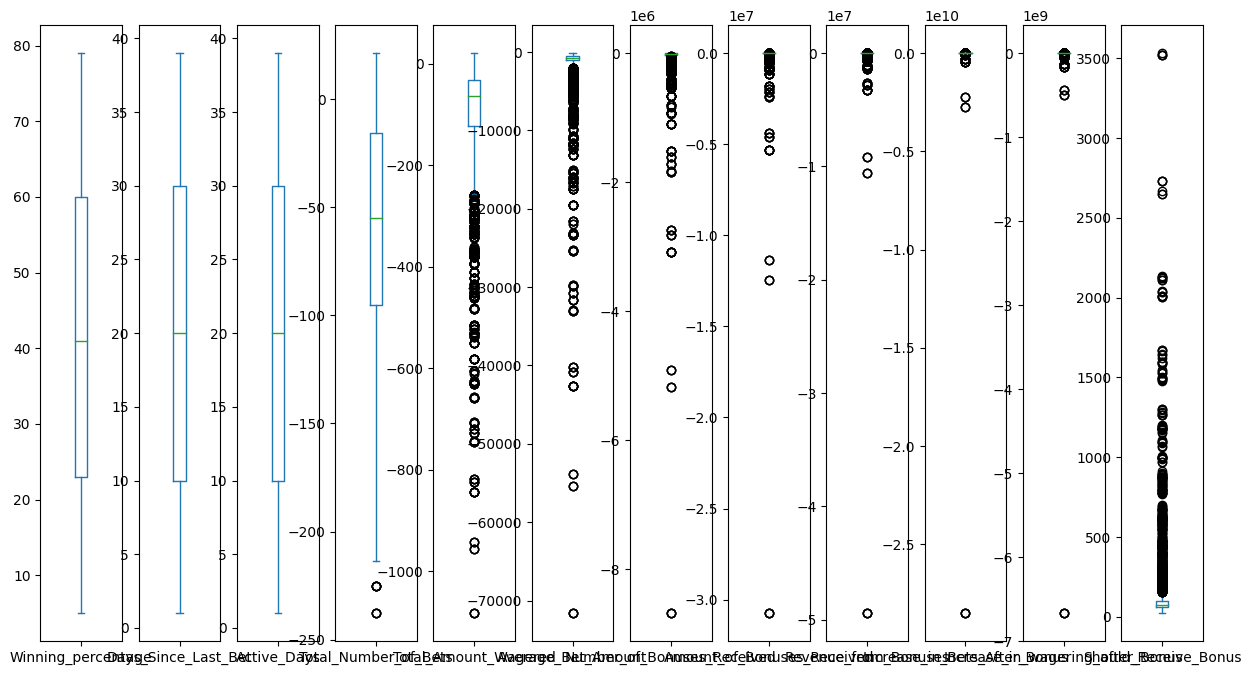

In [159]:
df1.plot(kind = 'box',subplots = True, sharey=False, figsize=(15,8))

In [265]:
df1.shape

(5000, 11)

In [266]:
df2["Should_Receive_Bonus"].shape

(5000,)

In [267]:
raw_data = pd.concat([df1,df2["Should_Receive_Bonus"]],axis=1)

In [268]:
raw_data.shape

(5000, 12)

In [162]:
winsor = Winsorizer(capping_method = 'iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['Winning_percentage', 'Days_Since_Last_Bet', 'Active_Days',
       'Total_Number_of_Bets', 'Total_Amount_Wagered', 'Average_Bet_Amount',
       'Number_of_Bonuses_Received', 'Amount_of_Bonuses_Received',
       'Revenue_from_Bonuses', 'Increase_in_Bets_After_Bonus',
       'Increase_in_wagering_after_Bonus', 'Should_Receive_Bonus'])

In [163]:
df2 = pd.DataFrame(winsor.fit_transform(df1), columns = df1.columns).convert_dtypes()

In [164]:
df2.head()

,Winning_percentage,Days_Since_Last_Bet,Active_Days,Total_Number_of_Bets,Total_Amount_Wagered,Average_Bet_Amount,Number_of_Bonuses_Received,Amount_of_Bonuses_Received,Revenue_from_Bonuses,Increase_in_Bets_After_Bonus,Increase_in_wagering_after_Bonus,Should_Receive_Bonus
0,43,34,39,-122.536081,-162.161198,-1538.002923,-32354.454545,-1535.364201,-1539.55791,-5272.43571,-38278.006891,132.116209
1,73,28,14,-9.436034,-56.511763,-685.363642,-13823.64663,-2555.47468,-2132.481862,-4740.439039,-43260.884227,89.883566
2,20,32,14,-30.823347,-34.676555,-457.118987,-6134.783276,-3257.744684,-2579.943656,-4392.149012,-48760.930748,54.457759
3,56,35,33,-76.937492,-53.525192,-321.032341,-7807.613632,-3621.285824,-2905.071948,-4217.592089,-47392.936211,74.05761
4,7,39,33,-115.742348,-186.78,-1576.941142,-26674.450296,-1581.741155,-1553.031307,-5247.844621,-38562.541696,118.348138


Winning_percentage                     Axes(0.125,0.11;0.0545775x0.77)
Days_Since_Last_Bet                 Axes(0.190493,0.11;0.0545775x0.77)
Active_Days                         Axes(0.255986,0.11;0.0545775x0.77)
Total_Number_of_Bets                Axes(0.321479,0.11;0.0545775x0.77)
Total_Amount_Wagered                Axes(0.386972,0.11;0.0545775x0.77)
Average_Bet_Amount                  Axes(0.452465,0.11;0.0545775x0.77)
Number_of_Bonuses_Received          Axes(0.517958,0.11;0.0545775x0.77)
Amount_of_Bonuses_Received          Axes(0.583451,0.11;0.0545775x0.77)
Revenue_from_Bonuses                Axes(0.648944,0.11;0.0545775x0.77)
Increase_in_Bets_After_Bonus        Axes(0.714437,0.11;0.0545775x0.77)
Increase_in_wagering_after_Bonus     Axes(0.77993,0.11;0.0545775x0.77)
Should_Receive_Bonus                Axes(0.845423,0.11;0.0545775x0.77)
dtype: object

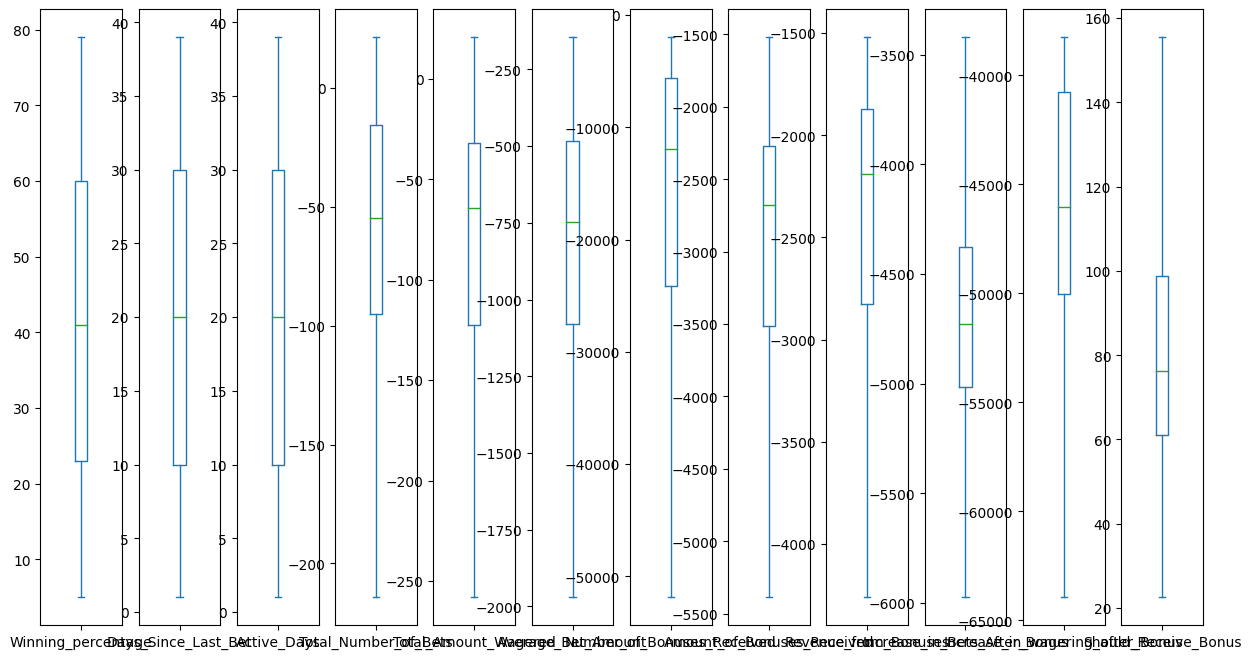

In [165]:
df2.plot(kind = 'box',subplots = True, sharey=False, figsize=(15,8))

In [22]:
df1.shape

(5000, 12)

In [98]:
df1.corr()

,Winning_percentage,Days_Since_Last_Bet,Active_Days,Total_Number_of_Bets,Total_Amount_Wagered,Average_Bet_Amount,Number_of_Bonuses_Received,Amount_of_Bonuses_Received,Revenue_from_Bonuses,Increase_in_Bets_After_Bonus,Increase_in_wagering_after_Bonus,Should_Receive_Bonus
Winning_percentage,1.000000,0.000957,0.015802,0.014100,0.017948,0.001054,-0.010279,-0.018218,-0.021299,-0.022374,-0.022005,0.037623
Days_Since_Last_Bet,0.000957,1.000000,0.022421,0.218649,0.267324,0.226389,0.169803,0.118583,0.085884,0.058589,0.059430,-0.206693
Active_Days,0.015802,0.022421,1.000000,0.209487,0.164843,0.165721,0.131809,0.100138,0.077176,0.057201,0.056891,-0.142679
Total_Number_of_Bets,0.014100,0.218649,0.209487,1.000000,0.643817,0.530123,0.356050,0.238113,0.173894,0.118626,0.120247,-0.521475
Total_Amount_Wagered,0.017948,0.267324,0.164843,0.643817,1.000000,0.869399,0.657828,0.471827,0.357298,0.258157,0.259969,-0.870347
Average_Bet_Amount,0.001054,0.226389,0.165721,0.530123,0.869399,1.000000,0.901154,0.731473,0.586849,0.457692,0.457362,-0.998715
Number_of_Bonuses_Received,-0.010279,0.169803,0.131809,0.356050,0.657828,0.901154,1.000000,0.941927,0.829101,0.712633,0.707350,-0.899427
Amount_of_Bonuses_Received,-0.018218,0.118583,0.100138,0.238113,0.471827,0.731473,0.941927,1.000000,0.962089,0.891688,0.884641,-0.729868
Revenue_from_Bonuses,-0.021299,0.085884,0.077176,0.173894,0.357298,0.586849,0.829101,0.962089,1.000000,0.981200,0.977453,-0.585694
Increase_in_Bets_After_Bonus,-0.022374,0.058589,0.057201,0.118626,0.258157,0.457692,0.712633,0.891688,0.981200,1.000000,0.999318,-0.456884


In [166]:
df2.corr()

,Winning_percentage,Days_Since_Last_Bet,Active_Days,Total_Number_of_Bets,Total_Amount_Wagered,Average_Bet_Amount,Number_of_Bonuses_Received,Amount_of_Bonuses_Received,Revenue_from_Bonuses,Increase_in_Bets_After_Bonus,Increase_in_wagering_after_Bonus,Should_Receive_Bonus
Winning_percentage,1.000000,-0.036568,-0.006643,-0.017492,-0.023245,-0.012445,-0.014267,0.000224,-0.002519,-0.005584,0.006480,0.275021
Days_Since_Last_Bet,-0.036568,1.000000,0.010135,0.214825,0.257265,0.215514,0.201994,0.108238,0.127980,0.119478,0.078148,-0.087909
Active_Days,-0.006643,0.010135,1.000000,0.202268,0.110080,0.150773,0.168547,0.070068,0.079350,0.112900,0.093194,-0.002790
Total_Number_of_Bets,-0.017492,0.214825,0.202268,1.000000,0.550451,0.410926,0.474644,0.567110,0.600074,0.079031,0.474740,-0.379820
Total_Amount_Wagered,-0.023245,0.257265,0.110080,0.550451,1.000000,0.800975,0.935448,0.336075,0.448990,0.326389,0.079240,-0.792568
Average_Bet_Amount,-0.012445,0.215514,0.150773,0.410926,0.800975,1.000000,0.903576,0.057089,0.145045,0.545084,0.080010,-0.925728
Number_of_Bonuses_Received,-0.014267,0.201994,0.168547,0.474644,0.935448,0.903576,1.000000,0.250982,0.354589,0.461159,0.099261,-0.875426
Amount_of_Bonuses_Received,0.000224,0.108238,0.070068,0.567110,0.336075,0.057089,0.250982,1.000000,0.988534,-0.322050,0.811385,-0.156956
Revenue_from_Bonuses,-0.002519,0.127980,0.079350,0.600074,0.448990,0.145045,0.354589,0.988534,1.000000,-0.290659,0.745553,-0.242014
Increase_in_Bets_After_Bonus,-0.005584,0.119478,0.112900,0.079031,0.326389,0.545084,0.461159,-0.322050,-0.290659,1.000000,-0.052446,-0.466124


In [167]:
import numpy as np

def min_max_scaling(feature, new_min, new_max):
  min_val = np.min(feature)
  max_val = np.max(feature)
  scaled_feature = (feature - min_val) / (max_val - min_val) * (new_max - new_min) + new_min
  return scaled_feature


In [25]:
df1.columns

Index(['Winning_percentage', 'Days_Since_Last_Bet', 'Active_Days',
       'Total_Number_of_Bets', 'Total_Amount_Wagered', 'Average_Bet_Amount',
       'Number_of_Bonuses_Received', 'Amount_of_Bonuses_Received',
       'Revenue_from_Bonuses', 'Increase_in_Bets_After_Bonus',
       'Increase_in_wagering_after_Bonus', 'Should_Receive_Bonus'],
      dtype='object')

In [100]:
df1["Days_Since_Last_Bet"] = min_max_scaling(df1["Days_Since_Last_Bet"], 1, 40)
df1["Days_Since_Last_Bet"] = round(df1["Days_Since_Last_Bet"])

In [168]:
df2["Days_Since_Last_Bet"] = min_max_scaling(df2["Days_Since_Last_Bet"], 1, 40)
df2["Days_Since_Last_Bet"] = round(df2["Days_Since_Last_Bet"])

In [101]:
df1["Active_Days"] = min_max_scaling(df1["Active_Days"], 90, 365)
df1["Active_Days"] = round(df1["Active_Days"])

In [169]:
df2["Active_Days"] = min_max_scaling(df2["Active_Days"], 90, 365)
df2["Active_Days"] = round(df2["Active_Days"])

In [102]:
df1["Total_Number_of_Bets"] = min_max_scaling(df1["Total_Number_of_Bets"], 1, 50)
df1["Total_Number_of_Bets"] = round(df1["Total_Number_of_Bets"])

In [170]:
df2["Total_Number_of_Bets"] = min_max_scaling(df2["Total_Number_of_Bets"], 1, 50)
df2["Total_Number_of_Bets"] = round(df2["Total_Number_of_Bets"])

In [103]:
df1["Total_Amount_Wagered"] = min_max_scaling(df1["Total_Amount_Wagered"], 100, 100000)
df1["Total_Amount_Wagered"] = round(df1["Total_Amount_Wagered"])

In [171]:
df2["Total_Amount_Wagered"] = min_max_scaling(df2["Total_Amount_Wagered"], 100, 100000)
df2["Total_Amount_Wagered"] = round(df2["Total_Amount_Wagered"])

In [104]:
df1["Average_Bet_Amount"] = min_max_scaling(df1["Average_Bet_Amount"], 10, 1000)
df1["Average_Bet_Amount"] = round(df1["Average_Bet_Amount"])

In [172]:
df2["Average_Bet_Amount"] = min_max_scaling(df2["Average_Bet_Amount"], 10, 1000)
df2["Average_Bet_Amount"] = round(df2["Average_Bet_Amount"])

In [105]:
df1["Number_of_Bonuses_Received"] = min_max_scaling(df1["Number_of_Bonuses_Received"], 1, 100)
df1["Number_of_Bonuses_Received"] = round(df1["Number_of_Bonuses_Received"])

In [173]:
df2["Number_of_Bonuses_Received"] = min_max_scaling(df2["Number_of_Bonuses_Received"], 1, 100)
df2["Number_of_Bonuses_Received"] = round(df2["Number_of_Bonuses_Received"])

In [106]:
df1["Amount_of_Bonuses_Received"] = min_max_scaling(df1["Amount_of_Bonuses_Received"], 10, 1000)
df1["Amount_of_Bonuses_Received"] = round(df1["Amount_of_Bonuses_Received"])

In [174]:
df2["Amount_of_Bonuses_Received"] = min_max_scaling(df2["Amount_of_Bonuses_Received"], 10, 1000)
df2["Amount_of_Bonuses_Received"] = round(df2["Amount_of_Bonuses_Received"])

In [107]:
df1["Revenue_from_Bonuses"] = min_max_scaling(df1["Revenue_from_Bonuses"], 10, 5000)
df1["Revenue_from_Bonuses"] = round(df1["Revenue_from_Bonuses"])

In [175]:
df2["Revenue_from_Bonuses"] = min_max_scaling(df2["Revenue_from_Bonuses"], 10, 5000)
df2["Revenue_from_Bonuses"] = round(df2["Revenue_from_Bonuses"])

In [108]:
df1["Increase_in_Bets_After_Bonus"] = min_max_scaling(df1["Increase_in_Bets_After_Bonus"], 30, 500)
df1["Increase_in_Bets_After_Bonus"] = round(df1["Increase_in_Bets_After_Bonus"])

In [176]:
df2["Increase_in_Bets_After_Bonus"] = min_max_scaling(df2["Increase_in_Bets_After_Bonus"], 30, 500)
df2["Increase_in_Bets_After_Bonus"] = round(df2["Increase_in_Bets_After_Bonus"])

In [124]:
df1["Increase_in_wagering_after_Bonus"] = min_max_scaling(df1["Increase_in_wagering_after_Bonus"], 100, 50000)
df1["Increase_in_wagering_after_Bonus"] = round(df1["Increase_in_wagering_after_Bonus"])

In [177]:
df2["Increase_in_wagering_after_Bonus"] = min_max_scaling(df2["Increase_in_wagering_after_Bonus"], 100, 50000)
df2["Increase_in_wagering_after_Bonus"] = round(df2["Increase_in_wagering_after_Bonus"])

In [110]:
df1["Should_Receive_Bonus"] = min_max_scaling(df1["Should_Receive_Bonus"], 10, 500)
df1["Should_Receive_Bonus"] = round(df1["Should_Receive_Bonus"])

In [178]:
df2["Should_Receive_Bonus"] = min_max_scaling(df2["Should_Receive_Bonus"], 10, 500)
df2["Should_Receive_Bonus"] = round(df2["Should_Receive_Bonus"])

In [111]:
df1.corr()

,Winning_percentage,Days_Since_Last_Bet,Active_Days,Total_Number_of_Bets,Total_Amount_Wagered,Average_Bet_Amount,Number_of_Bonuses_Received,Amount_of_Bonuses_Received,Revenue_from_Bonuses,Increase_in_Bets_After_Bonus,Increase_in_wagering_after_Bonus,Should_Receive_Bonus
Winning_percentage,1.000000,0.001096,0.015779,0.013916,0.017948,0.001002,-0.010795,-0.018212,-0.021291,-0.022418,-0.022004,0.037682
Days_Since_Last_Bet,0.001096,1.000000,0.022268,0.218574,0.264741,0.223899,0.166960,0.117279,0.084916,0.057697,0.058715,-0.204136
Active_Days,0.015779,0.022268,1.000000,0.210260,0.164882,0.165886,0.131207,0.100021,0.077215,0.057270,0.056875,-0.142781
Total_Number_of_Bets,0.013916,0.218574,0.210260,1.000000,0.643158,0.529488,0.362670,0.237873,0.173973,0.118286,0.120234,-0.520738
Total_Amount_Wagered,0.017948,0.264741,0.164882,0.643158,1.000000,0.869325,0.655978,0.471800,0.357451,0.257536,0.259989,-0.870393
Average_Bet_Amount,0.001002,0.223899,0.165886,0.529488,0.869325,1.000000,0.902764,0.731423,0.587045,0.457166,0.457463,-0.998665
Number_of_Bonuses_Received,-0.010795,0.166960,0.131207,0.362670,0.655978,0.902764,1.000000,0.940277,0.827575,0.710807,0.705971,-0.900821
Amount_of_Bonuses_Received,-0.018212,0.117279,0.100021,0.237873,0.471800,0.731423,0.940277,1.000000,0.962247,0.891864,0.884846,-0.729589
Revenue_from_Bonuses,-0.021291,0.084916,0.077215,0.173973,0.357451,0.587045,0.827575,0.962247,1.000000,0.981166,0.977434,-0.585574
Increase_in_Bets_After_Bonus,-0.022418,0.057697,0.057270,0.118286,0.257536,0.457166,0.710807,0.891864,0.981166,1.000000,0.999290,-0.455998


In [179]:
df2.corr()

,Winning_percentage,Days_Since_Last_Bet,Active_Days,Total_Number_of_Bets,Total_Amount_Wagered,Average_Bet_Amount,Number_of_Bonuses_Received,Amount_of_Bonuses_Received,Revenue_from_Bonuses,Increase_in_Bets_After_Bonus,Increase_in_wagering_after_Bonus,Should_Receive_Bonus
Winning_percentage,1.000000,-0.036733,-0.006649,-0.018083,-0.023245,-0.012423,-0.014378,0.000226,-0.002520,-0.005618,0.006481,0.275038
Days_Since_Last_Bet,-0.036733,1.000000,0.010080,0.212911,0.255096,0.212609,0.200005,0.107764,0.127395,0.117547,0.077128,-0.084951
Active_Days,-0.006649,0.010080,1.000000,0.202141,0.110154,0.150814,0.168709,0.070083,0.079389,0.112945,0.093199,-0.002861
Total_Number_of_Bets,-0.018083,0.212911,0.202141,1.000000,0.550558,0.410626,0.474054,0.566944,0.599955,0.078375,0.473979,-0.379808
Total_Amount_Wagered,-0.023245,0.255096,0.110154,0.550558,1.000000,0.800967,0.935390,0.336101,0.448990,0.326435,0.079240,-0.792541
Average_Bet_Amount,-0.012423,0.212609,0.150814,0.410626,0.800967,1.000000,0.903490,0.057016,0.144972,0.545098,0.079957,-0.925710
Number_of_Bonuses_Received,-0.014378,0.200005,0.168709,0.474054,0.935390,0.903490,1.000000,0.250521,0.354107,0.461394,0.098867,-0.875307
Amount_of_Bonuses_Received,0.000226,0.107764,0.070083,0.566944,0.336101,0.057016,0.250521,1.000000,0.988536,-0.322077,0.811352,-0.156955
Revenue_from_Bonuses,-0.002520,0.127395,0.079389,0.599955,0.448990,0.144972,0.354107,0.988536,1.000000,-0.290683,0.745549,-0.242006
Increase_in_Bets_After_Bonus,-0.005618,0.117547,0.112945,0.078375,0.326435,0.545098,0.461394,-0.322077,-0.290683,1.000000,-0.052542,-0.466126


In [112]:
df1["Should_Receive_Bonus"].min()

10.0

In [39]:
df1["Should_Receive_Bonus"].max()

500.0

In [183]:
df2["Should_Receive_Bonus"].min()

10.0

In [184]:
df2["Should_Receive_Bonus"].max()


500.0

In [113]:
x  = [1 if i > 15 else 0 for i in df1["Should_Receive_Bonus"]]

In [199]:
x2 = [1 if i > 200 else 0 for i in df2["Should_Receive_Bonus"]]

In [200]:
x2 = pd.DataFrame(x2)

In [115]:
x = pd.DataFrame(x)

In [116]:
x.value_counts()


1    3593
0    1407
Name: count, dtype: int64

In [201]:
x2.value_counts()

1    2661
0    2339
Name: count, dtype: int64

In [117]:
df1["Should_Receive_Bonus"]= [1 if i > 15 else 0 for i in df1["Should_Receive_Bonus"]]

In [202]:
df2["Should_Receive_Bonus"]= [1 if i > 200 else 0 for i in df2["Should_Receive_Bonus"]]

In [203]:
df1["Should_Receive_Bonus"].value_counts()

Should_Receive_Bonus
446.750156    3
45.025499     3
67.733215     2
65.709536     2
52.841769     2
             ..
81.622193     1
82.762705     1
41.472425     1
32.880345     1
75.313351     1
Name: count, Length: 4884, dtype: int64

In [205]:
df2["Should_Receive_Bonus"].value_counts()

Should_Receive_Bonus
1    2661
0    2339
Name: count, dtype: int64

In [45]:
df1.corr()

,Winning_percentage,Days_Since_Last_Bet,Active_Days,Total_Number_of_Bets,Total_Amount_Wagered,Average_Bet_Amount,Number_of_Bonuses_Received,Amount_of_Bonuses_Received,Revenue_from_Bonuses,Increase_in_Bets_After_Bonus,Increase_in_wagering_after_Bonus,Should_Receive_Bonus
Winning_percentage,1.000000,-0.020148,-0.020881,-0.033563,-0.014686,-0.021418,-0.020859,-0.016889,-0.014581,-0.011880,-0.011462,0.366710
Days_Since_Last_Bet,-0.020148,1.000000,0.002796,0.214712,0.262416,0.220054,0.160583,0.110734,0.079984,0.053157,0.051679,0.100379
Active_Days,-0.020881,0.002796,1.000000,0.195192,0.144408,0.161536,0.134548,0.099675,0.074916,0.052962,0.050835,0.142909
Total_Number_of_Bets,-0.033563,0.214712,0.195192,1.000000,0.643872,0.536043,0.360399,0.229414,0.166266,0.109312,0.106594,-0.001881
Total_Amount_Wagered,-0.014686,0.262416,0.144408,0.643872,1.000000,0.870453,0.642656,0.451784,0.339687,0.237462,0.230520,-0.259412
Average_Bet_Amount,-0.021418,0.220054,0.161536,0.536043,0.870453,1.000000,0.892831,0.715258,0.569846,0.431737,0.417241,-0.181171
Number_of_Bonuses_Received,-0.020859,0.160583,0.134548,0.360399,0.642656,0.892831,1.000000,0.939942,0.819982,0.686857,0.664088,-0.083974
Amount_of_Bonuses_Received,-0.016889,0.110734,0.099675,0.229414,0.451784,0.715258,0.939942,1.000000,0.955878,0.869513,0.847930,-0.047637
Revenue_from_Bonuses,-0.014581,0.079984,0.074916,0.166266,0.339687,0.569846,0.819982,0.955878,1.000000,0.976077,0.965272,-0.033277
Increase_in_Bets_After_Bonus,-0.011880,0.053157,0.052962,0.109312,0.237462,0.431737,0.686857,0.869513,0.976077,1.000000,0.998452,-0.020351


In [206]:
df2.corr()

,Winning_percentage,Days_Since_Last_Bet,Active_Days,Total_Number_of_Bets,Total_Amount_Wagered,Average_Bet_Amount,Number_of_Bonuses_Received,Amount_of_Bonuses_Received,Revenue_from_Bonuses,Increase_in_Bets_After_Bonus,Increase_in_wagering_after_Bonus,Should_Receive_Bonus
Winning_percentage,1.000000,-0.036733,-0.006649,-0.018083,-0.023245,-0.012423,-0.014378,0.000226,-0.002520,-0.005618,0.006481,0.351672
Days_Since_Last_Bet,-0.036733,1.000000,0.010080,0.212911,0.255096,0.212609,0.200005,0.107764,0.127395,0.117547,0.077128,-0.005975
Active_Days,-0.006649,0.010080,1.000000,0.202141,0.110154,0.150814,0.168709,0.070083,0.079389,0.112945,0.093199,0.122798
Total_Number_of_Bets,-0.018083,0.212911,0.202141,1.000000,0.550558,0.410626,0.474054,0.566944,0.599955,0.078375,0.473979,-0.073492
Total_Amount_Wagered,-0.023245,0.255096,0.110154,0.550558,1.000000,0.800967,0.935390,0.336101,0.448990,0.326435,0.079240,-0.467007
Average_Bet_Amount,-0.012423,0.212609,0.150814,0.410626,0.800967,1.000000,0.903490,0.057016,0.144972,0.545098,0.079957,-0.644275
Number_of_Bonuses_Received,-0.014378,0.200005,0.168709,0.474054,0.935390,0.903490,1.000000,0.250521,0.354107,0.461394,0.098867,-0.560689
Amount_of_Bonuses_Received,0.000226,0.107764,0.070083,0.566944,0.336101,0.057016,0.250521,1.000000,0.988536,-0.322077,0.811352,0.188413
Revenue_from_Bonuses,-0.002520,0.127395,0.079389,0.599955,0.448990,0.144972,0.354107,0.988536,1.000000,-0.290683,0.745549,0.132045
Increase_in_Bets_After_Bonus,-0.005618,0.117547,0.112945,0.078375,0.326435,0.545098,0.461394,-0.322077,-0.290683,1.000000,-0.052542,-0.464116


In [122]:
import seaborn as sns

In [126]:
clean_data = "final_clean_data_2.csv"

In [208]:
clean_data_3 = "final_clean_data_3.csv"

In [120]:
df1.to_csv(clean_data,index=False)

In [209]:
df2.to_csv(clean_data_3,index=False)

In [127]:
df1.head()

,Winning_percentage,Days_Since_Last_Bet,Active_Days,Total_Number_of_Bets,Total_Amount_Wagered,Average_Bet_Amount,Number_of_Bonuses_Received,Amount_of_Bonuses_Received,Revenue_from_Bonuses,Increase_in_Bets_After_Bonus,Increase_in_wagering_after_Bonus,Should_Receive_Bonus
0,69,34.0,220.0,42.0,93091.0,996.0,100.0,1000.0,5000.0,500.0,50000.0,1
1,40,6.0,133.0,24.0,82195.0,980.0,100.0,1000.0,5000.0,500.0,50000.0,1
2,36,4.0,104.0,12.0,50648.0,780.0,95.0,988.0,4973.0,500.0,49977.0,1
3,10,16.0,162.0,42.0,96397.0,993.0,100.0,1000.0,5000.0,500.0,50000.0,0
4,55,11.0,104.0,24.0,86330.0,985.0,100.0,1000.0,5000.0,500.0,50000.0,1


In [243]:


def generate_fake_data(num_customers, max_repeats):
  fake = Faker()
  data = []

  for _ in range(num_customers):
    customer_id = fake.random_int(min=1000, max=9999)
    first_name = fake.first_name()
    last_name = fake.last_name()
    country = fake.country()
    age = fake.random_int(min=18, max=80)
    gender = fake.random_element(elements=('Male', 'Female'))
    income_level = fake.random_int(min=20000, max=150000)

    for _ in range(fake.random_int(min=1, max=max_repeats)):
      data.append([customer_id, first_name, last_name, country, age, gender, income_level])

  df = pd.DataFrame(data, columns=['customer_id', 'first_name', 'last_name', 'country', 'age', 'gender', 'income_level'])
  return df

# Example usage:
num_customers = 5000
max_repeats = 15
fake_data = generate_fake_data(num_customers, max_repeats)
fake_data = fake_data[:5000]
print(fake_data)


      customer_id first_name  last_name   country  age  gender  income_level
0            6910         Jo  Hernandez      Oman   67  Female        117653
1            6910         Jo  Hernandez      Oman   67  Female        117653
2            6910         Jo  Hernandez      Oman   67  Female        117653
3            6910         Jo  Hernandez      Oman   67  Female        117653
4            6910         Jo  Hernandez      Oman   67  Female        117653
...           ...        ...        ...       ...  ...     ...           ...
4995         9289       Anna   Thompson  Cambodia   33  Female        104096
4996         9289       Anna   Thompson  Cambodia   33  Female        104096
4997         9289       Anna   Thompson  Cambodia   33  Female        104096
4998         9289       Anna   Thompson  Cambodia   33  Female        104096
4999         6243      Malik      Gomez  Dominica   25    Male        115523

[5000 rows x 7 columns]


In [244]:

def shuffle_data(df):
    # Create a unique identifier for each customer
    df['customer_group'] = df.groupby(['customer_id', 'first_name', 'last_name', 'country', 'age', 'gender', 'income_level']).ngroup()

    # Shuffle the DataFrame
    df = df.sample(frac=1)

    # Drop the temporary customer_group column
    df.drop(columns=['customer_group'], inplace=True)

    return df


In [245]:
fake_data_1 = shuffle_data(fake_data)

In [249]:
fake_data_1.head()

,customer_id,first_name,last_name,country,age,gender,income_level
2798,7642,Denise,Macdonald,Azerbaijan,69,Female,65937
4667,2841,Denise,Richards,Aruba,31,Female,69914
366,1449,William,Weaver,Saint Vincent and the Grenadines,19,Female,123848
3938,5623,Jessica,Baker,Honduras,63,Male,133766
4054,7210,Jonathon,Henderson,Turkey,55,Female,120076


In [250]:
fake_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2798 to 555
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   5000 non-null   object
 1   first_name    5000 non-null   object
 2   last_name     5000 non-null   object
 3   country       5000 non-null   object
 4   age           5000 non-null   int64 
 5   gender        5000 non-null   object
 6   income_level  5000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 312.5+ KB


In [251]:
fake_data_1["customer_id"] = fake_data_1["customer_id"].astype(object)

In [261]:
fake_data_1.shape

(5000, 7)

In [262]:
raw_data.shape

(10000, 12)

In [269]:
raw_data_2 = pd.concat([fake_data_1,raw_data],axis = 1)

In [270]:
raw_data_2.head()

,customer_id,first_name,last_name,country,age,gender,income_level,Winning_percentage,Days_Since_Last_Bet,Active_Days,Total_Number_of_Bets,Total_Amount_Wagered,Average_Bet_Amount,Number_of_Bonuses_Received,Amount_of_Bonuses_Received,Revenue_from_Bonuses,Increase_in_Bets_After_Bonus,Increase_in_wagering_after_Bonus,Should_Receive_Bonus
2798,7642,Denise,Macdonald,Azerbaijan,69,Female,65937,33,26,4,-82.395542,-2.795048,-787.476484,-7235.461932,-2334.008728,-2080.054618,-4858.764100,-4.374971e+04,1
4667,2841,Denise,Richards,Aruba,31,Female,69914,54,2,37,-178.999196,-520.781625,-14725.340601,-366356.593410,-257367.621015,-222473.453563,-824986.498948,-1.773943e+06,1
366,1449,William,Weaver,Saint Vincent and the Grenadines,19,Female,123848,40,26,6,-61.553425,14.054675,-839.219028,-2550.571482,-2309.299415,-1997.750311,-4868.663029,-4.727045e+04,1
3938,5623,Jessica,Baker,Honduras,63,Male,133766,65,35,18,-40.333950,-50.243692,-272.237733,-4557.867528,-3656.659893,-3261.844998,-4461.773074,-4.567964e+04,1
4054,7210,Jonathon,Henderson,Turkey,55,Female,120076,67,19,26,13.826570,-117.275240,-1231.062798,-25031.844223,-1627.045301,-1591.325856,-5085.636828,-3.650014e+04,0


In [271]:
raw_data_1 = 'raw_data.csv'

In [272]:
raw_data_2.to_csv(raw_data_1,index=False)

In [216]:
df_final = pd.concat([fake_data_1,df2],axis = 1)

In [135]:
df1.shape

(5000, 12)

In [136]:
fake_data_1.shape

(5000, 7)

In [217]:
df_final = df_final.reset_index()

In [218]:
df_final.head()

,index,customer_id,first_name,last_name,country,age,gender,income_level,Winning_percentage,Days_Since_Last_Bet,Active_Days,Total_Number_of_Bets,Total_Amount_Wagered,Average_Bet_Amount,Number_of_Bonuses_Received,Amount_of_Bonuses_Received,Revenue_from_Bonuses,Increase_in_Bets_After_Bonus,Increase_in_wagering_after_Bonus,Should_Receive_Bonus
0,1938,5532,Patricia,Larson,Kyrgyz Republic,70,Male,99652,27,1.0,199.0,21.0,11730.0,10.0,47.0,810.0,3699.0,230.0,49829.0,1
1,3133,5858,Harold,Lawson,Monaco,64,Female,78767,42,10.0,155.0,33.0,84857.0,842.0,96.0,527.0,2984.0,331.0,25621.0,0
2,2267,8611,Stacey,Mcknight,Latvia,33,Male,75757,61,28.0,104.0,26.0,81070.0,687.0,77.0,752.0,3994.0,251.0,39845.0,1
3,3861,1954,Kylie,Blevins,Gambia,53,Male,60292,46,12.0,220.0,44.0,65937.0,725.0,75.0,720.0,3781.0,262.0,41223.0,0
4,695,3025,Matthew,Moore,Togo,55,Female,144473,52,18.0,97.0,25.0,78765.0,650.0,71.0,798.0,4183.0,234.0,42959.0,0


In [219]:
df_final = df_final.drop(columns = ["index"])

In [220]:
total_clean_data = "total_clean_data_1.csv"

In [221]:
df_final.to_csv(total_clean_data, index=False)

In [142]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       5000 non-null   object 
 1   first_name                        5000 non-null   object 
 2   last_name                         5000 non-null   object 
 3   country                           5000 non-null   object 
 4   age                               5000 non-null   int64  
 5   gender                            5000 non-null   object 
 6   income_level                      5000 non-null   int64  
 7   Winning_percentage                5000 non-null   int32  
 8   Days_Since_Last_Bet               5000 non-null   float64
 9   Active_Days                       5000 non-null   float64
 10  Total_Number_of_Bets              5000 non-null   float64
 11  Total_Amount_Wagered              5000 non-null   float64
 12  Averag